In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index=imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index=dict([(value,key) for (key,value)in word_index.items()])
for i in range(1,31):
  print(i,'-',reverse_word_index[i])

1 - the
2 - and
3 - a
4 - of
5 - to
6 - is
7 - br
8 - in
9 - it
10 - i
11 - this
12 - that
13 - was
14 - as
15 - for
16 - with
17 - movie
18 - but
19 - film
20 - on
21 - not
22 - you
23 - are
24 - his
25 - have
26 - he
27 - be
28 - one
29 - all
30 - at


In [ ]:
decoded_review=' '.join([reverse_word_index[i] for i in x_train [9]])
decoded_review

"the as on there plot she's iii film that for find that saw better just is along wrong silly awesome or play this you doing was one in own that successful are make and old plot gets unfortunately of on was although except value omar that with her do they gets for that with timing really way that is played character i i what poor set but is along 100 studio on film is missing br received fact to is mercifully br fabulous and them powers is tapes br enjoys indicate good women show to one good played i i was plain film because avoid for of totally it time do period it couple in college in viewers get br of my to of material it yet br out more"

In [ ]:
def vectorize_sequences(sequences,dimention=10000):
  results=np.zeros((len(sequences),dimention))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return results 

In [ ]:
x_train=vectorize_sequences(x_train)
x_test=vectorize_sequences(x_test)

In [ ]:
x_train[19]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
len(x_train[12])

10000

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                160016    
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
textmodel=model.fit(x_train,y_train,epochs=20,batch_size=128,validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 4s 17ms/step - loss: 0.3606 - accuracy: 0.8554 - val_loss: 0.2731 - val_accuracy: 0.8940
Epoch 2/20
176/176 [==============================] - 2s 14ms/step - loss: 0.2070 - accuracy: 0.9218 - val_loss: 0.2796 - val_accuracy: 0.8916
Epoch 3/20
176/176 [==============================] - 2s 13ms/step - loss: 0.1639 - accuracy: 0.9380 - val_loss: 0.3044 - val_accuracy: 0.8884
Epoch 4/20
176/176 [==============================] - 2s 13ms/step - loss: 0.1361 - accuracy: 0.9496 - val_loss: 0.3701 - val_accuracy: 0.8772
Epoch 5/20
176/176 [==============================] - 3s 15ms/step - loss: 0.1143 - accuracy: 0.9591 - val_loss: 0.3894 - val_accuracy: 0.8792
Epoch 6/20
176/176 [==============================] - 2s 13ms/step - loss: 0.0954 - accuracy: 0.9662 - val_loss: 0.4133 - val_accuracy: 0.8852
Epoch 7/20
176/176 [==============================] - 2s 12ms/step - loss: 0.0809 - accuracy: 0.9698 - val_loss: 0.4512 - val_accuracy: 0.8804

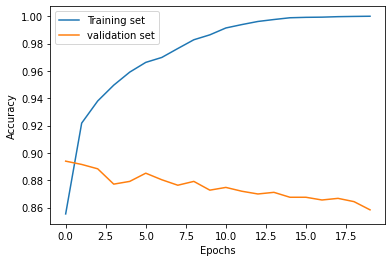

In [ ]:
plt.plot(textmodel.history['accuracy'],label='Training set')
plt.plot(textmodel.history['val_accuracy'],label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
finalscore=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 2.1099 - accuracy: 0.8420
